In [ ]:
# import combined_financial_data as df
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('combined_financial_data.csv')

In [ ]:
# Define the industry classification for the stocks
industry_classification = {
    'AAPL': 'Technology', 'CRM': 'Technology', 'CSCO': 'Technology', 'IBM': 'Technology',
    'INTC': 'Technology', 'MSFT': 'Technology', 'TSLA': 'Technology',
    'AMGN': 'Healthcare', 'JNJ': 'Healthcare', 'MRK': 'Healthcare', 'UNH': 'Healthcare',
    'AXP': 'Financial Services', 'GS': 'Financial Services', 'JPM': 'Financial Services',
    'TRV': 'Financial Services', 'Visa': 'Financial Services',
    'KO': 'Consumer Goods', 'MCD': 'Consumer Goods', 'NKE': 'Consumer Goods', 'WMT': 'Consumer Goods',
    'BA': 'Industrial', 'CAT': 'Industrial', 'HD': 'Industrial', 'HON': 'Industrial', 'MMM': 'Industrial',
    'CVX': 'Energy',
    'VZ': 'Telecommunications',
    'DIS': 'Entertainment'
}

# Map the stock symbols to their respective industries
data['Industry'] = data['stock'].map(industry_classification)

# Verify the mapping by displaying the first few rows of the dataset with the new Industry column
data.head()

,stock,Date,PX_LAST,PX_OPEN,PX_HIGH,PX_LOW,PX_VOLUME,Volatility,Change,% Change,ticker_attention,name_price_attention,Industry
0,AAPL,2023-01-31,143.305,141.726,143.355,141.309,NaN,2.046,-1.132,-0.783733,18.20,51.52,Technology
1,AAPL,2023-01-30,142.024,143.966,144.557,141.875,NaN,2.682,-1.281,-0.893898,18.48,44.24,Technology
2,AAPL,2023-01-27,144.934,142.178,146.225,142.103,NaN,4.122,2.910,2.048949,18.76,54.88,Technology
3,AAPL,2023-01-26,142.977,142.193,143.265,140.931,NaN,2.334,-1.957,-1.350270,20.72,49.84,Technology
4,AAPL,2023-01-25,140.892,139.928,141.458,137.863,NaN,3.595,-2.085,-1.458277,17.92,47.04,Technology


In [ ]:
# Check unique values with frequencies in the 'Industry' column
industry_counts = data['Industry'].value_counts()

# Display the result
print("Unique values with frequencies in the 'Industry' column:")
print(industry_counts)


Unique values with frequencies in the 'Industry' column:
Technology            17766
Financial Services    12690
Industrial            10402
Healthcare            10152
Consumer Goods        10152
Energy                 2538
Entertainment          2538
Telecommunications     2538
Name: Industry, dtype: int64


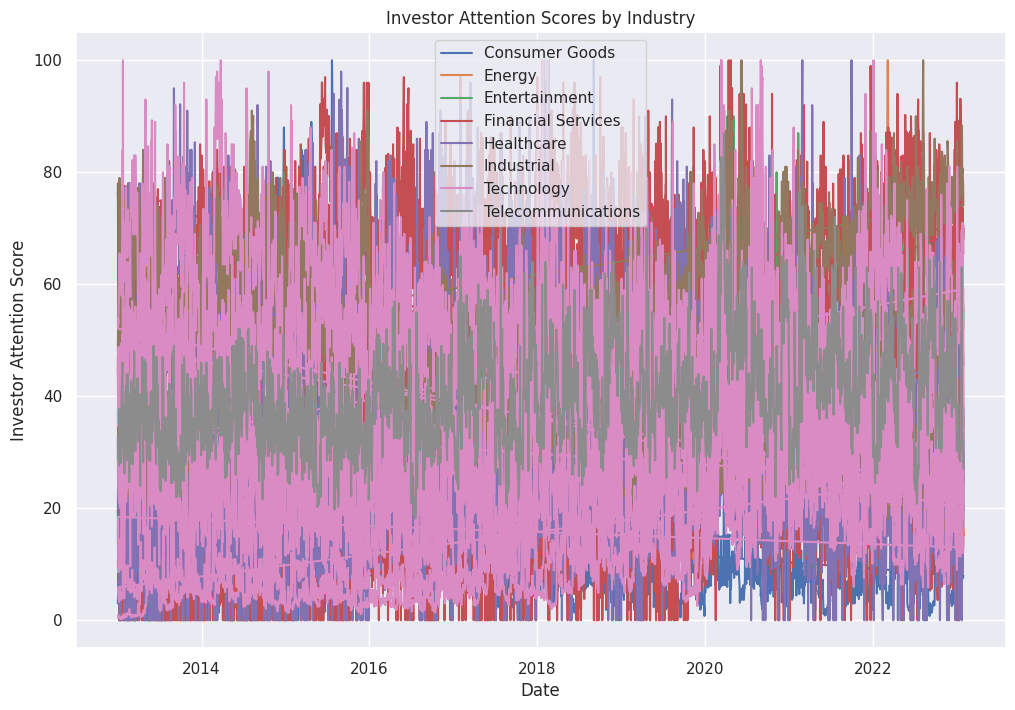

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


# Convert 'Date' to datetime format
data['Date'] = pd.to_datetime(data['Date'])

# Group data by Industry
industry_groups = data.groupby('Industry')

# Plot time series for each industry
plt.figure(figsize=(12, 8))
for industry, group_data in industry_groups:
    plt.plot(group_data['Date'], group_data['ticker_attention'], label=industry)

# Add title and labels
plt.title('Investor Attention Scores by Industry')
plt.xlabel('Date')
plt.ylabel('Investor Attention Score')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
import pandas as pd


# Create a pivot table
pivot_table = data.pivot_table(index='Date', columns='Industry', values='ticker_attention', aggfunc='mean')

# Display the pivot table
print(pivot_table)


Industry    Consumer Goods  Energy  Entertainment  Financial Services  \
Date                                                                    
2013-01-02         21.8400   13.64          29.52              45.770   
2013-01-03         20.0450   16.28          24.12              38.544   
2013-01-04         21.6525   16.94          27.72              52.110   
2013-01-07         21.5000   15.84          27.72              43.002   
2013-01-08         20.6450   17.16          31.32              32.320   
...                    ...     ...            ...                 ...   
2023-01-25         20.1400   17.16          53.94              47.624   
2023-01-26         21.1825   31.20          54.56              45.154   
2023-01-27         20.0000   39.00          59.52              50.136   
2023-01-30         19.9300   15.60          53.94              47.116   
2023-01-31         22.4450   15.99          55.80              40.072   

Industry    Healthcare  Industrial  Technology  Te

<ipython-input-72-bf07c368de19>:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  yearly_data = industry_groups.resample('Y', on='Date').mean().reset_index()
<ipython-input-72-bf07c368de19>:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  yearly_data = industry_groups.resample('Y', on='Date').mean().reset_index()
<ipython-input-72-bf07c368de19>:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  yearly_data = industry_gro

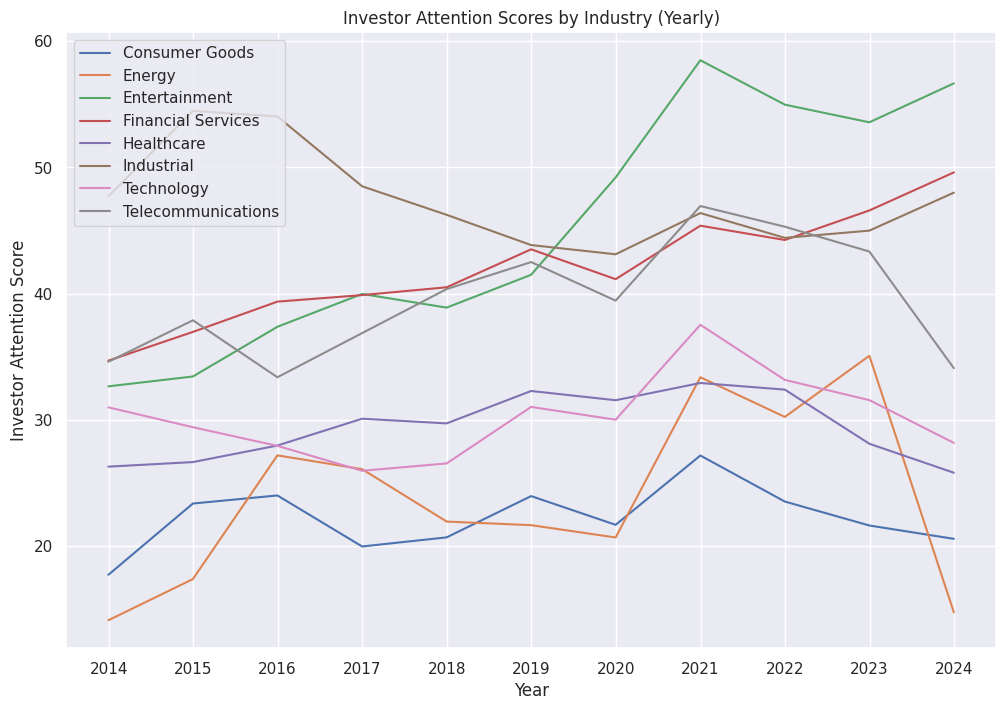

In [ ]:
import matplotlib.pyplot as plt

# Group data by Industry
industry_groups = data.groupby('Industry')

# Resample data to yearly frequency and calculate the mean for each industry
yearly_data = industry_groups.resample('Y', on='Date').mean().reset_index()

# Plot time series for each industry
plt.figure(figsize=(12, 8))
for industry in yearly_data['Industry'].unique():
    industry_data = yearly_data[yearly_data['Industry'] == industry]
    plt.plot(industry_data['Date'], industry_data['ticker_attention'], label=industry)

# Add title and labels
plt.title('Investor Attention Scores by Industry (Yearly)')
plt.xlabel('Year')
plt.ylabel('Investor Attention Score')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()


In [ ]:
import pandas as pd

# Reshape the dataframe to have industries as columns and dates as rows
table_data = yearly_data.pivot(index='Date', columns='Industry', values='ticker_attention')

# Display the table
print(table_data)


Industry    Consumer Goods     Energy  Entertainment  Financial Services  \
Date                                                                       
2013-12-31       17.699732  14.094603      32.644087           34.681603   
2014-12-31       23.350179  17.358968      33.423889           36.959532   
2015-12-31       23.990317  27.169881      37.365238           39.359730   
2016-12-31       19.946091  26.076786      39.970476           39.879246   
2017-12-31       20.666404  21.920757      38.885418           40.498239   
2018-12-31       23.940040  21.634821      41.489482           43.508223   
2019-12-31       21.662044  20.657302      49.207698           41.140873   
2020-12-31       27.157935  33.363794      58.501660           45.383281   
2021-12-31       23.506379  30.218056      54.980516           44.249595   
2022-12-31       21.607739  35.065418      53.580478           46.590558   
2023-12-31       20.550125  14.722500      56.668000           49.608400   

Industry   

**Consumer Goods:** Investor attention in the Consumer Goods industry has fluctuated over the years but generally remained within a certain range. There was a notable increase in attention in 2020, which could be attributed to various factors such as new product launches, marketing campaigns, or changes in consumer behavior due to the COVID-19 pandemic.

**Energy:** Investor attention in the Energy sector has shown significant variability, with peaks and troughs observed throughout the years. The attention seems to have increased notably in 2020, possibly influenced by developments in renewable energy, oil prices, or geopolitical factors affecting the energy market.

**Entertainment:** The Entertainment industry has experienced steady growth in investor attention over the years, with occasional spikes. The attention surged in 2020, which could be due to the increased demand for entertainment content during lockdowns and restrictions imposed globally.

**Financial Services:** Investor attention in Financial Services has shown a consistent upward trend over the years, with minor fluctuations. This could be attributed to various factors such as regulatory changes, economic indicators, or developments in financial technology (fintech).

**Healthcare:** Healthcare has seen fluctuations in investor attention, with peaks observed in certain years. The attention remained relatively stable in recent years, possibly influenced by advancements in medical technology, healthcare policies, or pharmaceutical innovations.

**Industrial:** Investor attention in the Industrial sector has fluctuated, with peaks and dips observed across different years. The attention seems to have stabilized in recent years, possibly reflecting the maturity of the sector and its resilience to economic fluctuations.

**Technology:** Technology has consistently attracted high investor attention, with relatively stable growth observed over the years. The attention surged notably in 2020, p
ossibly driven by advancements in digital technology, remote work trends, and the increasing reliance on tech solutions during the pandemic.

**Telecommunications:** Telecommunications has shown steady growth in investor attention, with minor fluctuations observed. The attention seems to have increased in recent years, possibly driven by developments in 5G technology, internet connectivity, and the digital transformation of communication networks.

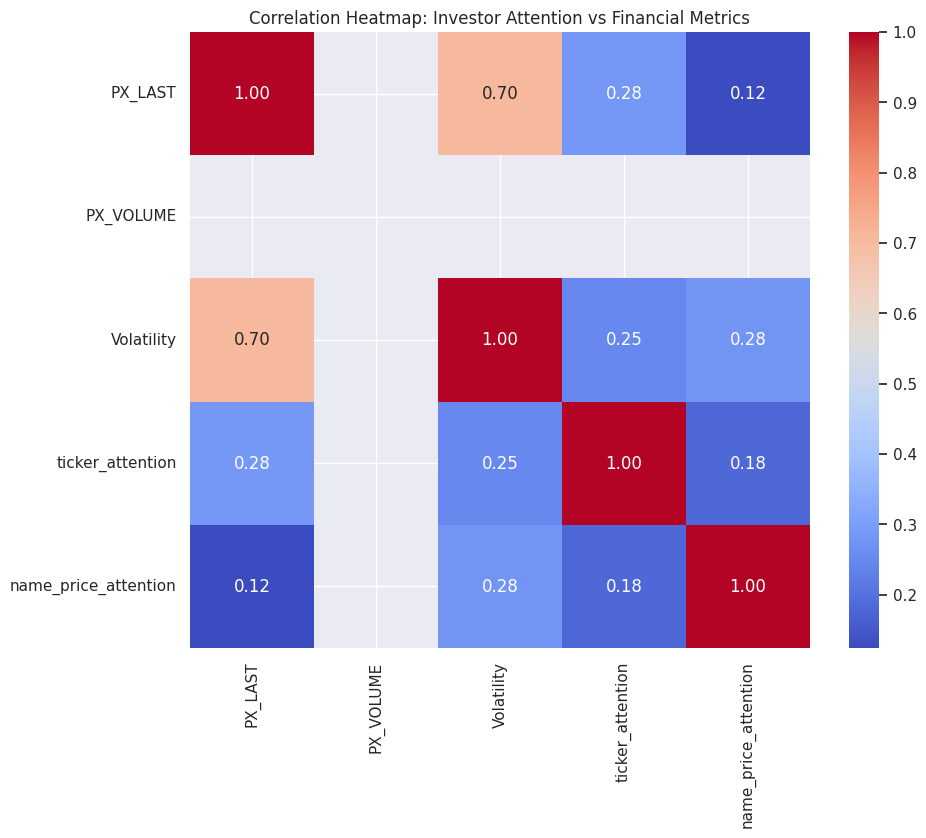

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select relevant columns for analysis
columns_of_interest = ['PX_LAST', 'PX_VOLUME', 'Volatility', 'ticker_attention', 'name_price_attention']
relevant_data = data[columns_of_interest]

# Calculate correlation matrix
correlation_matrix = relevant_data.corr()

# Visualize correlations using heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap: Investor Attention vs Financial Metrics')
plt.show()


In [ ]:
# Count the number of null values in each column
null_values_count = data.isnull().sum()

# Display the number of null values in each column
print("Number of null values in each column:")
print(null_values_count)


Number of null values in each column:
stock                       0
Date                        0
PX_LAST                     0
PX_OPEN                     0
PX_HIGH                     0
PX_LOW                      0
PX_VOLUME               68776
Volatility                  0
Change                      0
% Change                    0
ticker_attention            0
name_price_attention     9340
Industry                    0
dtype: int64


In [ ]:
# Drop the 'PX_VOLUME' column
data.drop(columns=['PX_VOLUME'], inplace=True)

# Verify the changes
print(data.head())


  stock       Date  PX_LAST  PX_OPEN  PX_HIGH   PX_LOW  Volatility  Change  \
0  AAPL 2023-01-31  143.305  141.726  143.355  141.309       2.046  -1.132   
1  AAPL 2023-01-30  142.024  143.966  144.557  141.875       2.682  -1.281   
2  AAPL 2023-01-27  144.934  142.178  146.225  142.103       4.122   2.910   
3  AAPL 2023-01-26  142.977  142.193  143.265  140.931       2.334  -1.957   
4  AAPL 2023-01-25  140.892  139.928  141.458  137.863       3.595  -2.085   

   % Change  ticker_attention  name_price_attention    Industry  
0 -0.783733             18.20                 51.52  Technology  
1 -0.893898             18.48                 44.24  Technology  
2  2.048949             18.76                 54.88  Technology  
3 -1.350270             20.72                 49.84  Technology  
4 -1.458277             17.92                 47.04  Technology  


In [ ]:
# Convert correlation matrix to DataFrame
correlation_table = correlation_matrix.reset_index().melt(id_vars='index', var_name='Financial Metric', value_name='Correlation')

# Display correlation table
print(correlation_table)


                   index      Financial Metric  Correlation
0                PX_LAST               PX_LAST     1.000000
1              PX_VOLUME               PX_LAST          NaN
2             Volatility               PX_LAST     0.702396
3       ticker_attention               PX_LAST     0.283178
4   name_price_attention               PX_LAST     0.124071
5                PX_LAST             PX_VOLUME          NaN
6              PX_VOLUME             PX_VOLUME          NaN
7             Volatility             PX_VOLUME          NaN
8       ticker_attention             PX_VOLUME          NaN
9   name_price_attention             PX_VOLUME          NaN
10               PX_LAST            Volatility     0.702396
11             PX_VOLUME            Volatility          NaN
12            Volatility            Volatility     1.000000
13      ticker_attention            Volatility     0.249731
14  name_price_attention            Volatility     0.276437
15               PX_LAST      ticker_att

In [ ]:
# Drop rows with null values in the 'name_price_attention' column
data_cleaned = data.dropna(subset=['name_price_attention'])

# Display the shape of the cleaned dataset to verify the number of rows after dropping null values
print("Shape of cleaned dataset after dropping null values:", data_cleaned.shape)


Shape of cleaned dataset after dropping null values: (59436, 12)


<ipython-input-79-8d03ca9bde22>:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  yearly_data = industry_groups.resample('Y', on='Date').mean().reset_index()
<ipython-input-79-8d03ca9bde22>:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  yearly_data = industry_groups.resample('Y', on='Date').mean().reset_index()
<ipython-input-79-8d03ca9bde22>:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  yearly_data = industry_gro

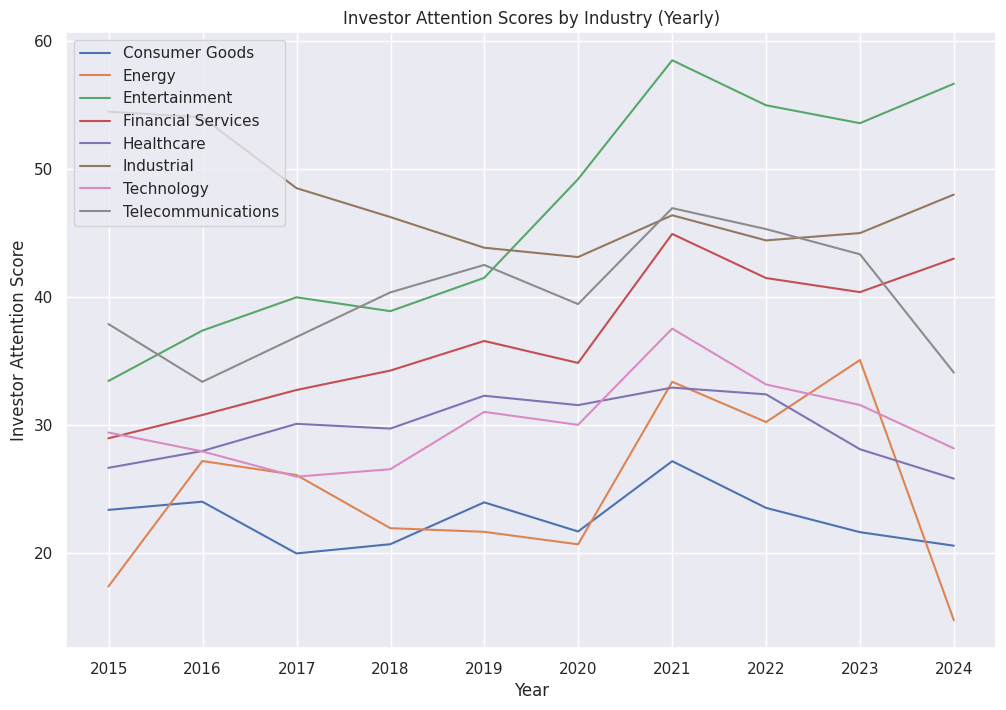

In [ ]:
import matplotlib.pyplot as plt

# Group data by Industry
industry_groups = data_cleaned.groupby('Industry')

# Resample data to yearly frequency and calculate the mean for each industry
yearly_data = industry_groups.resample('Y', on='Date').mean().reset_index()

# Plot time series for each industry
plt.figure(figsize=(12, 8))
for industry in yearly_data['Industry'].unique():
    industry_data = yearly_data[yearly_data['Industry'] == industry]
    plt.plot(industry_data['Date'], industry_data['ticker_attention'], label=industry)

# Add title and labels
plt.title('Investor Attention Scores by Industry (Yearly)')
plt.xlabel('Year')
plt.ylabel('Investor Attention Score')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()


In [ ]:
import pandas as pd

# Reshape the dataframe to have industries as columns and dates as rows
table_data = yearly_data.pivot(index='Date', columns='Industry', values='ticker_attention')

# Display the table
print(table_data)


Industry    Consumer Goods     Energy  Entertainment  Financial Services  \
Date                                                                       
2014-12-31       23.350179  17.358968      33.423889           28.945942   
2015-12-31       23.990317  27.169881      37.365238           30.768393   
2016-12-31       19.946091  26.076786      39.970476           32.721389   
2017-12-31       20.666404  21.920757      38.885418           34.240578   
2018-12-31       23.940040  21.634821      41.489482           36.556135   
2019-12-31       21.662044  20.657302      49.207698           34.838552   
2020-12-31       27.157935  33.363794      58.501660           44.922431   
2021-12-31       23.506379  30.218056      54.980516           41.473482   
2022-12-31       21.607739  35.065418      53.580478           40.374153   
2023-12-31       20.550125  14.722500      56.668000           42.993750   

Industry    Healthcare  Industrial  Technology  Telecommunications  
Date              

<ipython-input-81-6ce1a269852f>:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  four_months_data = industry_groups.resample('4M', on='Date').mean().reset_index()
<ipython-input-81-6ce1a269852f>:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  four_months_data = industry_groups.resample('4M', on='Date').mean().reset_index()
<ipython-input-81-6ce1a269852f>:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  four_months_da

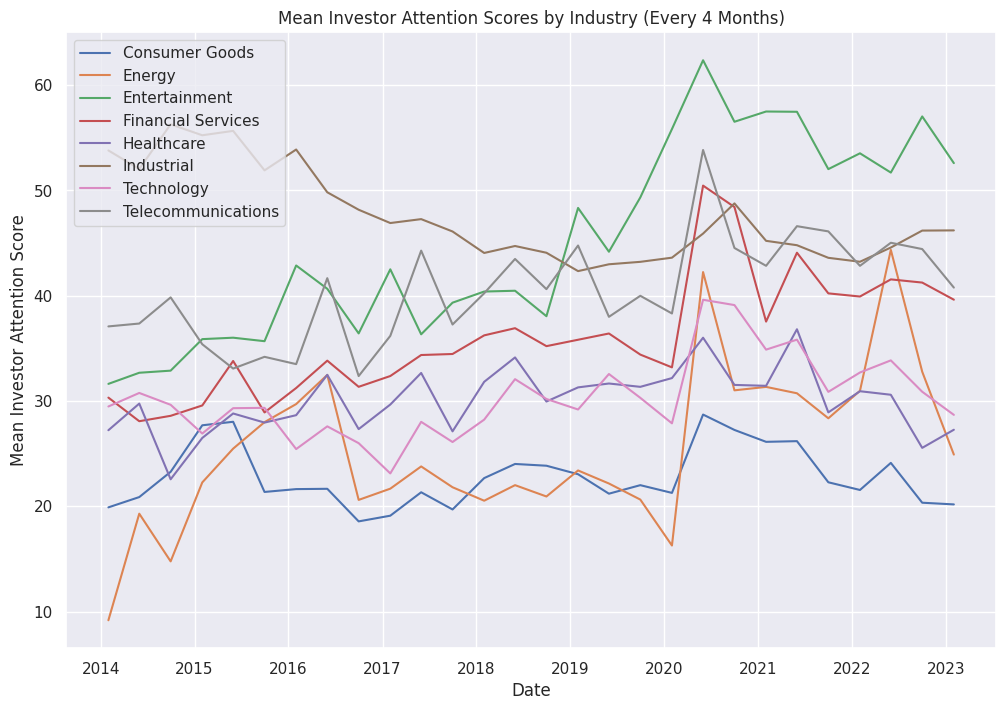

In [ ]:
import matplotlib.pyplot as plt

# Group data by Industry
industry_groups = data_cleaned.groupby('Industry')

# Resample data to 4-month frequency and calculate the mean for each industry
four_months_data = industry_groups.resample('4M', on='Date').mean().reset_index()

# Calculate the mean attention for every four-month interval
four_months_mean = four_months_data.groupby(['Industry', pd.Grouper(key='Date', freq='4M')])['ticker_attention'].mean().reset_index()

# Plot time series for each industry
plt.figure(figsize=(12, 8))
for industry in four_months_mean['Industry'].unique():
    industry_data = four_months_mean[four_months_mean['Industry'] == industry]
    plt.plot(industry_data['Date'], industry_data['ticker_attention'], label=industry)

# Add title and labels
plt.title('Mean Investor Attention Scores by Industry (Every 4 Months)')
plt.xlabel('Date')
plt.ylabel('Mean Investor Attention Score')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()


In [ ]:
import pandas as pd

# Group data by Industry
industry_groups = data_cleaned.groupby('Industry')

# Resample data to 4-month frequency and calculate the mean for each industry
four_months_data = industry_groups.resample('4M', on='Date').mean().reset_index()

# Calculate the mean attention for every four-month interval
four_months_mean = four_months_data.groupby(['Industry', pd.Grouper(key='Date', freq='4M')])['ticker_attention'].mean().reset_index()

# Pivot the data to create a table
table = four_months_mean.pivot_table(index='Date', columns='Industry', values='ticker_attention')

# Display the table
print(table)


Industry    Consumer Goods     Energy  Entertainment  Financial Services  \
Date                                                                       
2014-01-31       19.898929   9.178095      31.627143           30.321548   
2014-05-31       20.877165  19.298780      32.683537           28.080976   
2014-09-30       23.274853  14.769882      32.883882           28.593765   
2015-01-31       27.694018  22.268214      35.877143           29.577440   
2015-05-31       28.027805  25.476220      36.013171           33.800396   
2015-09-30       21.363576  27.992791      35.681395           28.915378   
2016-01-31       21.632651  29.709277      42.872169           31.234247   
2016-05-31       21.662143  32.475833      40.657619           33.832411   
2016-09-30       18.567616  20.607442      36.419419           31.348808   
2017-01-31       19.108494  21.675181      42.507229           32.372952   
2017-05-31       21.332651  23.786145      36.335422           34.368434   
2017-09-30  

<ipython-input-82-9d9c2502c89e>:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  four_months_data = industry_groups.resample('4M', on='Date').mean().reset_index()
<ipython-input-82-9d9c2502c89e>:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  four_months_data = industry_groups.resample('4M', on='Date').mean().reset_index()
<ipython-input-82-9d9c2502c89e>:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  four_months_da

**Consumer Goods Industry:**
Insights: Investor attention remains relatively stable throughout the observed period, with no significant dips or rises. This stability suggests that consumer goods companies may have consistent performance and investor interest.

**Energy Industry:**

Period of Dip: Early 2014 to mid-2015

Period of Rise: Mid-2015 onwards

Reasons for Dip and Rise: The dip in investor attention could be attributed to declining oil prices, oversupply concerns, and geopolitical tensions. The subsequent rise may be due to stabilization in oil markets, improved financial performance by energy companies, and increased demand for renewable energy sources.

**Entertainment Industry:**
Insights: Investor attention in the entertainment sector experiences fluctuations but generally maintains an upward trend. Peaks and dips coincide with major releases of films, TV shows, or music albums, as well as shifts in consumer preferences and streaming platform performance.

**Financial Services Industry:**
Reasons for Fluctuations: Peaks and dips in investor attention coincide with economic events, regulatory changes, and financial market trends. For example, peaks may occur during periods of economic growth and favorable regulatory environments, while dips may occur during financial crises or regulatory scrutiny.

**Healthcare Industry:**

Period of Dip: Minor dip observed in 2020

Reasons for Dip: The dip in 2020 may be related to market volatility and uncertainty surrounding the COVID-19 pandemic. Investors may have been cautious about healthcare companies' prospects due to disruptions in healthcare services and clinical trials.

**Industrial Industry:**
Insights: Investor attention in the industrial sector exhibits fluctuations, influenced by economic factors, industrial developments, and global trade dynamics. Peaks and dips correspond to shifts in demand for industrial products, changes in manufacturing trends, and geopolitical tensions.

**Technology Industry:**
Reasons for Fluctuations: Fluctuations in investor attention in the technology sector coincide with product launches, technological advancements, regulatory scrutiny, and shifts in consumer behavior. Peaks may occur during product unveilings and successful earnings reports, while dips may result from cybersecurity concerns or regulatory challenges.

**Telecommunications Industry:**
Insights: Investor attention in the telecommunications sector fluctuates, driven by factors such as technological innovation, mergers and acquisitions, and changes in consumer demand for communication services. Peaks and dips may coincide with major product launches, regulatory decisions, and changes in market competition.


also Entertainment industry is rising in the perioud of COVID

**Consumer Goods:** Investor attention in the Consumer Goods industry has fluctuated over the years but generally remained within a certain range. There was a notable increase in attention in 2020, which could be attributed to various factors such as new product launches, marketing campaigns, or changes in consumer behavior due to the COVID-19 pandemic.

**Energy:** Investor attention in the Energy sector has shown significant variability, with peaks and troughs observed throughout the years. The attention seems to have increased notably in 2020, possibly influenced by developments in renewable energy, oil prices, or geopolitical factors affecting the energy market.

**Entertainment:** The Entertainment industry has experienced steady growth in investor attention over the years, with occasional spikes. The attention surged in 2020, which could be due to the increased demand for entertainment content during lockdowns and restrictions imposed globally.

**Financial Services:** Investor attention in Financial Services has shown a consistent upward trend over the years, with minor fluctuations. This could be attributed to various factors such as regulatory changes, economic indicators, or developments in financial technology (fintech).

**Healthcare:** Healthcare has seen fluctuations in investor attention, with peaks observed in certain years. The attention remained relatively stable in recent years, possibly influenced by advancements in medical technology, healthcare policies, or pharmaceutical innovations.

**Industrial:** Investor attention in the Industrial sector has fluctuated, with peaks and dips observed across different years. The attention seems to have stabilized in recent years, possibly reflecting the maturity of the sector and its resilience to economic fluctuations.

**Technology:** Technology has consistently attracted high investor attention, with relatively stable growth observed over the years. The attention surged notably in 2020, p
ossibly driven by advancements in digital technology, remote work trends, and the increasing reliance on tech solutions during the pandemic.

**Telecommunications:** Telecommunications has shown steady growth in investor attention, with minor fluctuations observed. The attention seems to have increased in recent years, possibly driven by developments in 5G technology, internet connectivity, and the digital transformation of communication networks.

In [ ]:
data.head()

,stock,Date,PX_LAST,PX_OPEN,PX_HIGH,PX_LOW,Volatility,Change,% Change,ticker_attention,name_price_attention,Industry
0,AAPL,2023-01-31,143.305,141.726,143.355,141.309,2.046,-1.132,-0.783733,18.20,51.52,Technology
1,AAPL,2023-01-30,142.024,143.966,144.557,141.875,2.682,-1.281,-0.893898,18.48,44.24,Technology
2,AAPL,2023-01-27,144.934,142.178,146.225,142.103,4.122,2.910,2.048949,18.76,54.88,Technology
3,AAPL,2023-01-26,142.977,142.193,143.265,140.931,2.334,-1.957,-1.350270,20.72,49.84,Technology
4,AAPL,2023-01-25,140.892,139.928,141.458,137.863,3.595,-2.085,-1.458277,17.92,47.04,Technology


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Separate features (X) and target variable (y)
X = data[['PX_LAST', 'PX_OPEN', 'PX_HIGH', 'PX_LOW', 'Volatility', 'Change', '% Change']]
y = data[['ticker_attention', 'name_price_attention']]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model (Linear Regression example)
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the testing set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Get coefficients or feature importances
coefficients = model.coef_
print("Coefficients:", coefficients)


ValueError: Input y contains NaN.

In [ ]:
# Count the number of null values in each column
null_values_count = data.isnull().sum()

# Display the number of null values in each column
print("Number of null values in each column:")
print(null_values_count)


Number of null values in each column:
stock                      0
Date                       0
PX_LAST                    0
PX_OPEN                    0
PX_HIGH                    0
PX_LOW                     0
Volatility                 0
Change                     0
% Change                   0
ticker_attention           0
name_price_attention    9340
Industry                   0
dtype: int64


In [ ]:
from sklearn.impute import KNNImputer

# Initialize the KNN imputer
imputer = KNNImputer(n_neighbors=5)

# Impute missing values
data_imputed = data.copy()  # Create a copy of the original data
data_imputed[['name_price_attention']] = imputer.fit_transform(data_imputed[['name_price_attention']])

# Check if there are any missing values left
print("Number of null values after imputation:")
print(data_imputed.isnull().sum())


Number of null values after imputation:
stock                   0
Date                    0
PX_LAST                 0
PX_OPEN                 0
PX_HIGH                 0
PX_LOW                  0
Volatility              0
Change                  0
% Change                0
ticker_attention        0
name_price_attention    0
Industry                0
dtype: int64
